# `trim_saddle_points`
``trim_saddle_points`` function is a filter which removes peaks that were mistakenly identified because they lie on a saddle or a ridge in the distance transform.

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
from edt import edt
ps.visualization.set_mpl_style()

## `dt`
The distance transform of a test image is detetmined using the `edt` method.

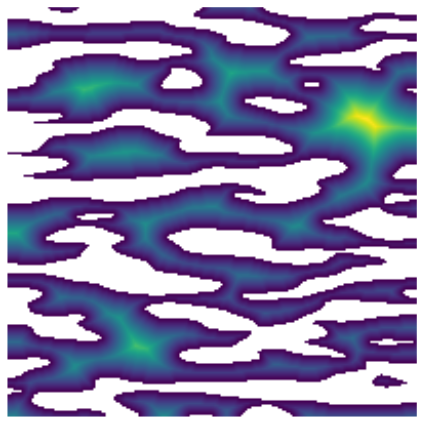

In [2]:
im = ps.generators.blobs(shape=[200, 200], blobiness=[2, .5], porosity=0.65)
dt = edt(im)

plt.figure(figsize=[6, 6]);
plt.axis(False);
plt.imshow(dt/im);

## `peaks`
`peaks` is found using the `find_peaks` filter on the distance transform. Peaks that lie on a saddle or a ridge are removed.

0it [00:00, ?it/s]

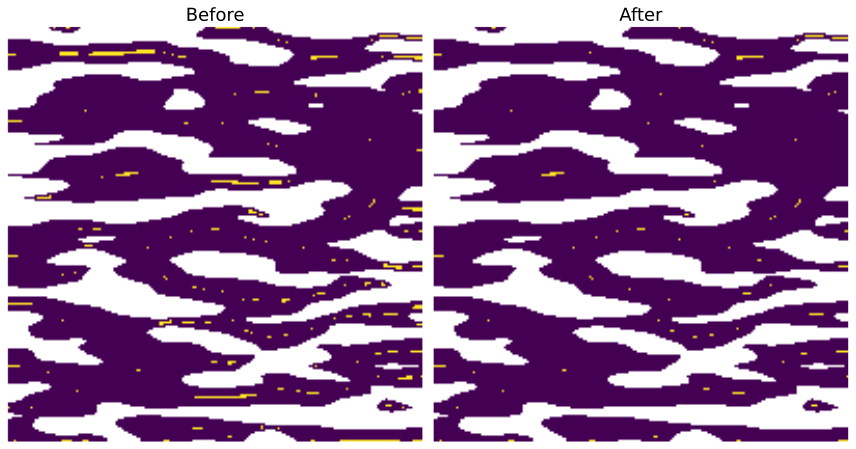

In [3]:
peaks = ps.filters.find_peaks(dt, r_max=4)

x = ps.filters.trim_saddle_points(peaks=peaks, dt=dt)

fix, ax = plt.subplots(1, 2, figsize=[12, 12])
ax[0].axis(False)
ax[0].imshow(peaks/im)
ax[0].set_title('Before', fontdict={'fontsize': 18});
ax[1].axis(False)
ax[1].imshow(x/im);
ax[1].set_title('After', fontdict={'fontsize': 18});